<a href="https://colab.research.google.com/github/yeho/scikit-learn-AI/blob/master/Analisis_Regresi%C3%B3n_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS COMPLETO DE REGRESIÓN LINEAL MÚLTIPLE
Dataset: Boston House Prices
Iniciando análisis completo de regresión lineal múltiple...

1. CARGANDO Y EXPLORANDO LOS DATOS
--------------------------------------------------
✓ Datos cargados exitosamente desde /content/sample_data/housing.csv
Dimensiones del dataset: (506, 14)
Variables: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Primeras 5 observaciones:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9

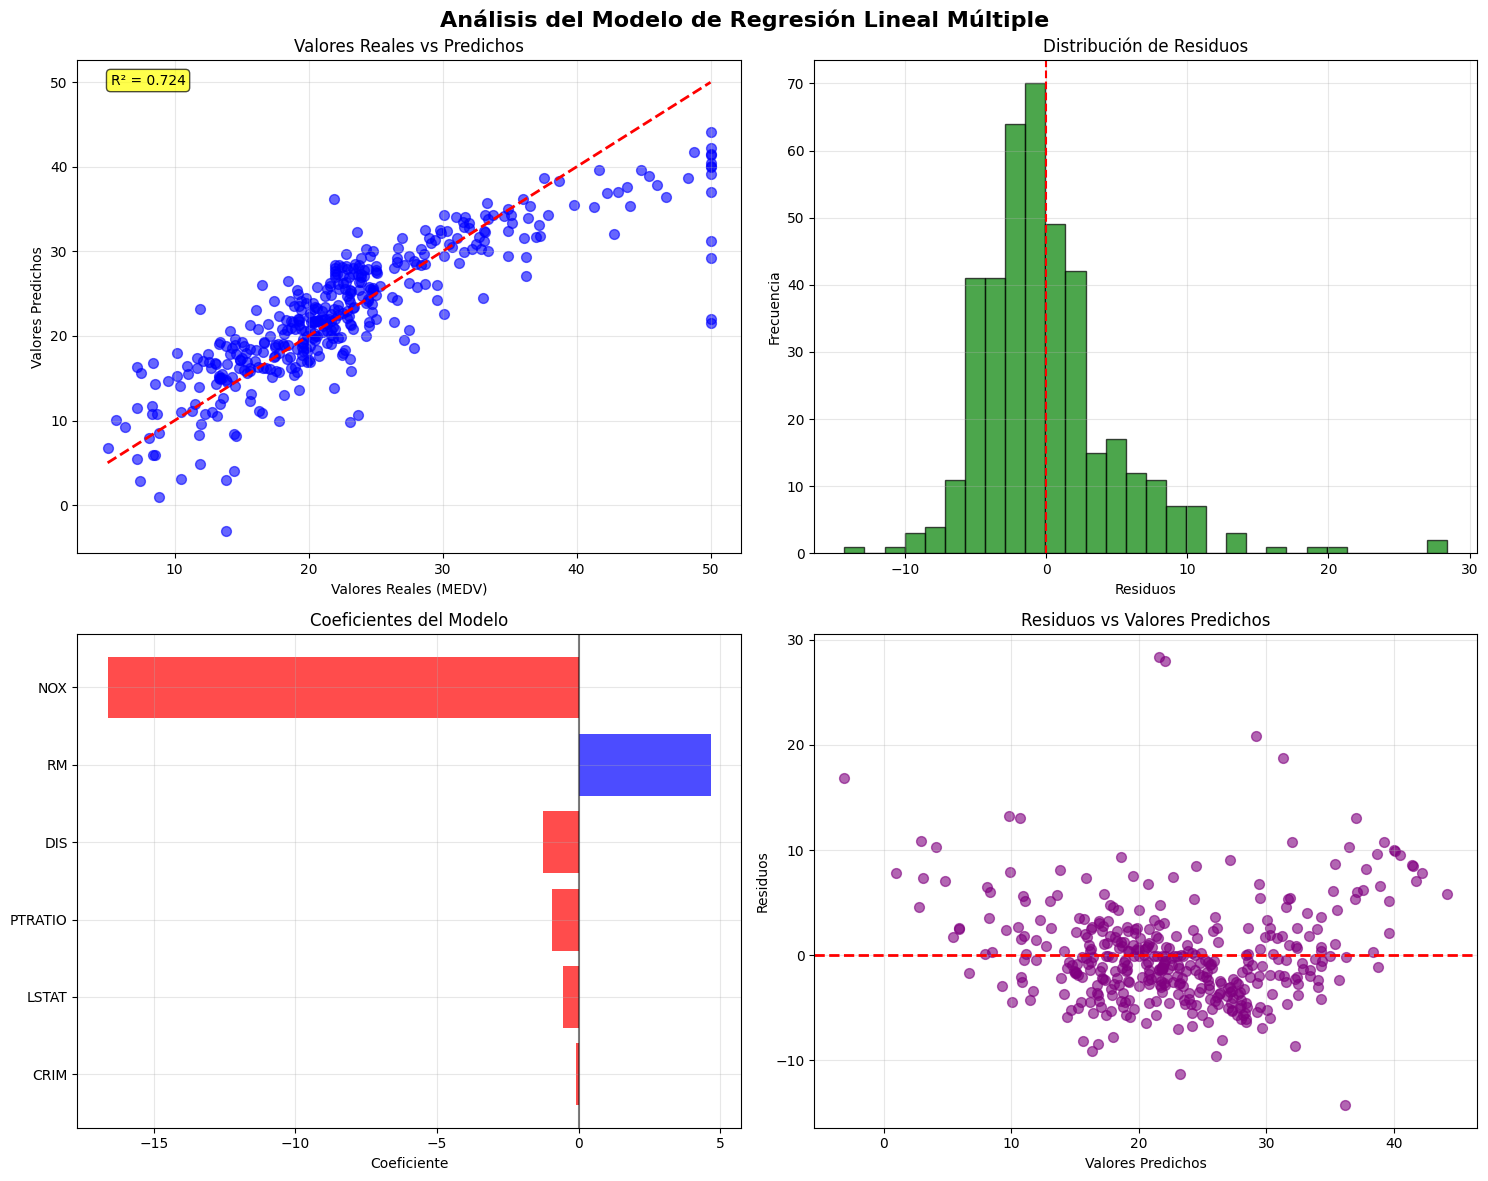


3. ANÁLISIS GEOMÉTRICO: PROYECCIÓN ORTOGONAL
--------------------------------------------------
ANÁLISIS DE RESIDUOS:
Media de residuos: 0.000000
Desviación estándar: 4.8999
Test Shapiro-Wilk (normalidad): p-valor = 0.0000
Test Jarque-Bera (normalidad): p-valor = 0.0000
Test homocedasticidad: p-valor = 0.4543
Outliers detectados (|residuo| > 3σ): 5 (1.24%)

📊 Generando visualizaciones del análisis geométrico...


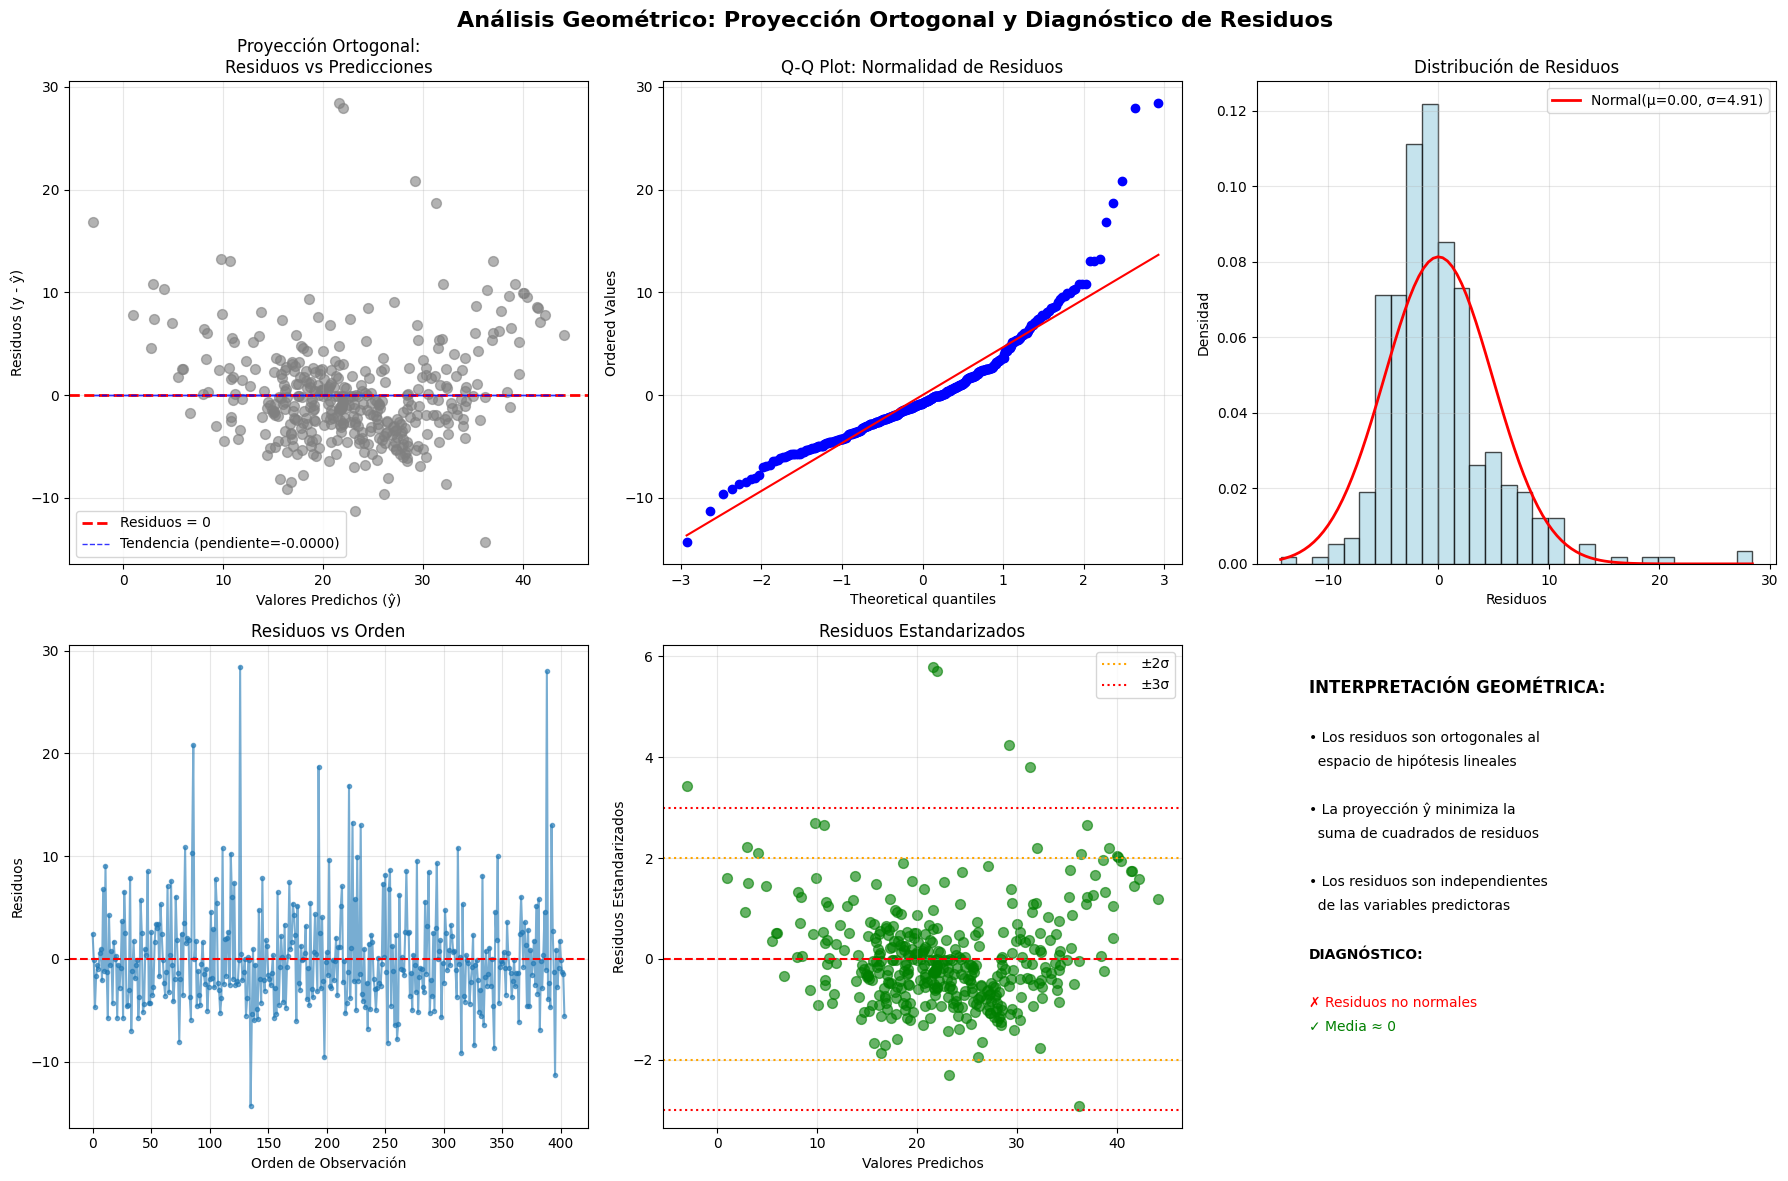


4. ENFOQUE PROBABILÍSTICO: REGRESIÓN BAYESIANA
--------------------------------------------------
COMPARACIÓN DE MODELOS:
R² Clásico: 0.7236
R² Bayesiano: 0.7236
Hiperparámetro α (precisión prior): 3.564841
Hiperparámetro λ (precisión ruido): 12.500966
Incertidumbre promedio: 0.5335

📊 Generando visualizaciones del análisis bayesiano...


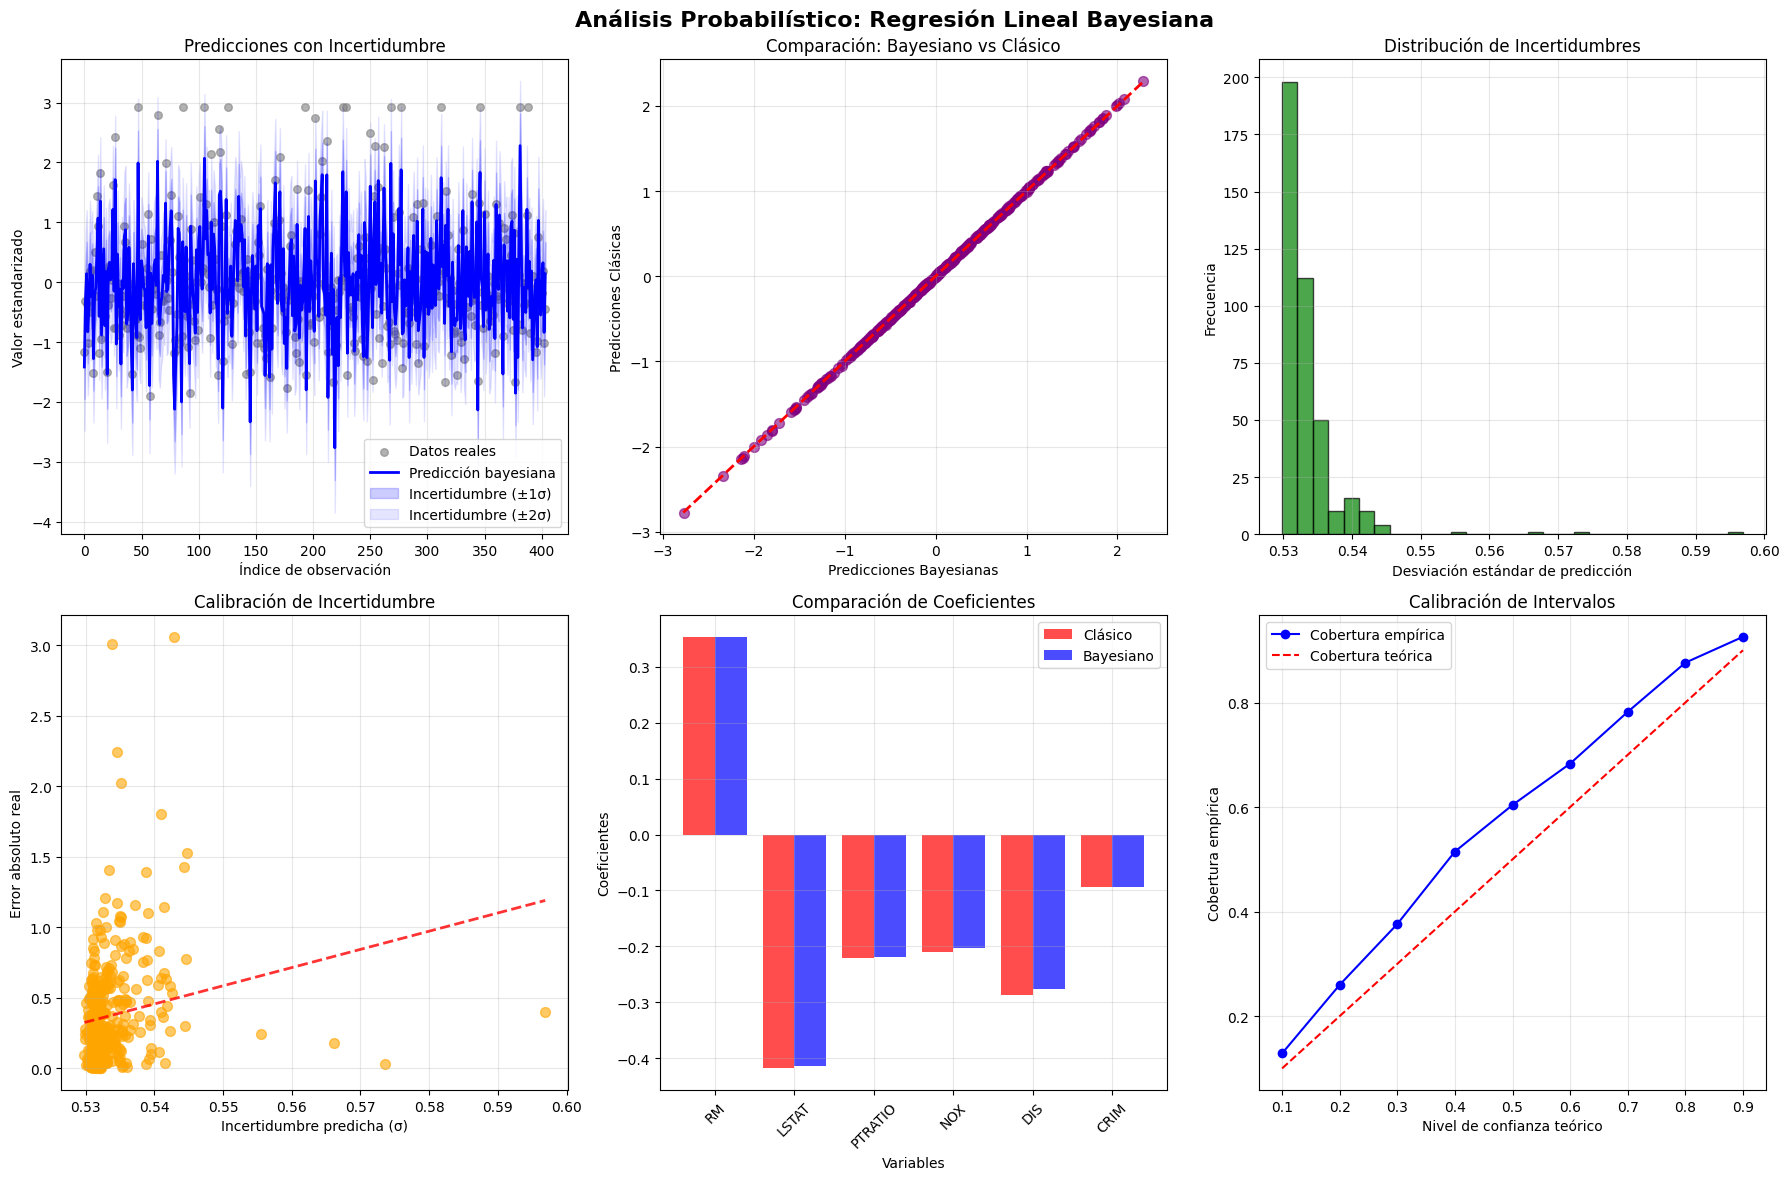


ANÁLISIS COMPLETADO EXITOSAMENTE

RESUMEN DE RESULTADOS:
• R² del modelo: 0.7236
• RMSE: 4.8999
• Variables más importantes: ['NOX', 'RM', 'DIS']
• Incertidumbre promedio (Bayesiano): 0.5335

INFORMACIÓN ADICIONAL

Para usar este análisis:
1. Las gráficas se han generado automáticamente
2. Los modelos están guardados en las variables 'modelo' y 'modelo_bayesiano'
3. Los coeficientes están en la variable 'coeficientes'
4. Puedes hacer predicciones con: modelo.predict(nuevos_datos)

Ejemplo de predicción:
# Para una casa con: 6 habitaciones, 10% población bajo estatus, ratio 15 alumnos/maestro,
# NOX=0.5, distancia=5, criminalidad=1
# nueva_casa = [[6, 10, 15, 0.5, 5, 1]]
# precio_predicho = modelo.predict(nueva_casa)
# print(f'Precio predicho: ${precio_predicho[0]*1000:.0f}')


In [ ]:
"""
Análisis de Regresión Lineal Múltiple
Dataset: Boston House Prices
Autor: Yeho

Este script incluye:
1. Análisis exploratorio del dataset
2. Implementación del modelo de regresión lineal múltiple
3. Análisis geométrico y visualización de residuos
4. Implementación del enfoque probabilístico bayesiano
5. Generación de graficas
"""

# ============================================================================
# IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib para mejor visualización
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12
plt.style.use('default')

print("="*80)
print("ANÁLISIS COMPLETO DE REGRESIÓN LINEAL MÚLTIPLE")
print("Dataset: Boston House Prices")
print("="*80)

# ============================================================================
# PARTE 1: CARGA Y ANÁLISIS EXPLORATORIO DE DATOS
# ============================================================================

def cargar_datos():
    """Cargar y preparar el dataset Boston Housing desde sample_data"""
    print("\n1. CARGANDO Y EXPLORANDO LOS DATOS")
    print("-" * 50)

    # Definir nombres de columnas
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                   'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

    # Cargar datos desde sample_data (ruta típica en Google Colab)
    try:
        datos = pd.read_csv('/content/sample_data/housing.csv', header=None,
                           names=column_names, sep='\s+')
        print("✓ Datos cargados exitosamente desde /content/sample_data/housing.csv")
    except FileNotFoundError:
        print("⚠ Archivo no encontrado en sample_data. Intentando ruta alternativa...")
        try:
            datos = pd.read_csv('sample_data/housing.csv', header=None,
                               names=column_names, sep='\s+')
            print("✓ Datos cargados desde sample_data/housing.csv")
        except FileNotFoundError:
            print("❌ Error: No se pudo encontrar housing.csv")
            print("Por favor, sube el archivo housing.csv a la carpeta sample_data")
            return None

    print(f"Dimensiones del dataset: {datos.shape}")
    print(f"Variables: {list(datos.columns)}")

    # Mostrar información básica
    print("\nPrimeras 5 observaciones:")
    print(datos.head())

    print("\nEstadísticas descriptivas:")
    print(datos.describe())

    print(f"\nValores faltantes: {datos.isnull().sum().sum()}")

    return datos

# ============================================================================
# PARTE 2: IMPLEMENTACIÓN DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE
# ============================================================================

def implementar_modelo_lineal(datos):
    """Implementar modelo de regresión lineal múltiple"""
    print("\n2. IMPLEMENTANDO MODELO DE REGRESIÓN LINEAL MÚLTIPLE")
    print("-" * 50)

    # Seleccionar variables basadas en relevancia teórica
    X = datos[['RM', 'LSTAT', 'PTRATIO', 'NOX', 'DIS', 'CRIM']]
    y = datos['MEDV']

    print(f"Variables independientes: {list(X.columns)}")
    print(f"Variable dependiente: MEDV")

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Mostrar ecuación del modelo
    print(f"\nECUACIÓN DEL MODELO:")
    ecuacion = f"MEDV = {modelo.intercept_:.3f}"
    for i, var in enumerate(X.columns):
        signo = '+' if modelo.coef_[i] >= 0 else ''
        ecuacion += f" {signo}{modelo.coef_[i]:.3f}*{var}"
    print(ecuacion)

    print(f"\nMÉTRICAS DE EVALUACIÓN:")
    print(f"R² (Entrenamiento): {r2_train:.4f}")
    print(f"R² (Prueba): {r2_test:.4f}")
    print(f"RMSE (Entrenamiento): {rmse_train:.4f}")
    print(f"RMSE (Prueba): {rmse_test:.4f}")

    # Crear DataFrame con coeficientes
    coeficientes = pd.DataFrame({
        'Variable': X.columns,
        'Coeficiente': modelo.coef_,
        'Interpretación': [
            f"${abs(coef)*1000:.0f} {'aumento' if coef > 0 else 'disminución'} por unidad"
            for coef in modelo.coef_
        ]
    })

    print(f"\nCOEFICIENTES E INTERPRETACIÓN:")
    print(coeficientes.to_string(index=False))

    return modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test, coeficientes

def visualizar_modelo_lineal(modelo, X_train, y_train, y_pred_train, coeficientes):
    """Crear visualizaciones del modelo de regresión lineal"""
    print("\n📊 Generando visualizaciones del modelo lineal...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análisis del Modelo de Regresión Lineal Múltiple', fontsize=16, fontweight='bold')

    # 1. Valores reales vs predichos
    axes[0,0].scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=50)
    axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Valores Reales (MEDV)')
    axes[0,0].set_ylabel('Valores Predichos')
    axes[0,0].set_title('Valores Reales vs Predichos')
    axes[0,0].grid(True, alpha=0.3)

    # Añadir R²
    r2 = r2_score(y_train, y_pred_train)
    axes[0,0].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0,0].transAxes,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    # 2. Distribución de residuos
    residuos = y_train - y_pred_train
    axes[0,1].hist(residuos, bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[0,1].set_xlabel('Residuos')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribución de Residuos')
    axes[0,1].axvline(x=0, color='red', linestyle='--')
    axes[0,1].grid(True, alpha=0.3)

    # 3. Coeficientes del modelo
    coef_sorted = coeficientes.sort_values('Coeficiente', key=abs, ascending=True)
    colors = ['red' if x < 0 else 'blue' for x in coef_sorted['Coeficiente']]
    axes[1,0].barh(coef_sorted['Variable'], coef_sorted['Coeficiente'], color=colors, alpha=0.7)
    axes[1,0].set_xlabel('Coeficiente')
    axes[1,0].set_title('Coeficientes del Modelo')
    axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.5)
    axes[1,0].grid(True, alpha=0.3)

    # 4. Residuos vs valores predichos
    axes[1,1].scatter(y_pred_train, residuos, alpha=0.6, color='purple', s=50)
    axes[1,1].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[1,1].set_xlabel('Valores Predichos')
    axes[1,1].set_ylabel('Residuos')
    axes[1,1].set_title('Residuos vs Valores Predichos')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ============================================================================
# PARTE 3: ANÁLISIS GEOMÉTRICO Y PROYECCIÓN ORTOGONAL
# ============================================================================

def analisis_geometrico(modelo, X_train, y_train, y_pred_train):
    """Análisis geométrico de la proyección ortogonal"""
    print("\n3. ANÁLISIS GEOMÉTRICO: PROYECCIÓN ORTOGONAL")
    print("-" * 50)

    residuos = y_train - y_pred_train

    # Calcular métricas estadísticas
    shapiro_stat, shapiro_p = stats.shapiro(residuos)
    jb_stat, jb_p = stats.jarque_bera(residuos)

    # Test de homocedasticidad (aproximación)
    residuos_cuadrados = residuos**2
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred_train, residuos_cuadrados)

    print(f"ANÁLISIS DE RESIDUOS:")
    print(f"Media de residuos: {np.mean(residuos):.6f}")
    print(f"Desviación estándar: {np.std(residuos):.4f}")
    print(f"Test Shapiro-Wilk (normalidad): p-valor = {shapiro_p:.4f}")
    print(f"Test Jarque-Bera (normalidad): p-valor = {jb_p:.4f}")
    print(f"Test homocedasticidad: p-valor = {p_value:.4f}")

    # Detectar outliers
    outliers = np.abs(residuos) > 3 * np.std(residuos)
    print(f"Outliers detectados (|residuo| > 3σ): {np.sum(outliers)} ({np.sum(outliers)/len(residuos)*100:.2f}%)")

    return residuos

def visualizar_analisis_geometrico(y_train, y_pred_train, residuos):
    """Crear visualizaciones del análisis geométrico"""
    print("\n📊 Generando visualizaciones del análisis geométrico...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Análisis Geométrico: Proyección Ortogonal y Diagnóstico de Residuos',
                 fontsize=16, fontweight='bold')

    # 1. Residuos vs Valores Predichos (análisis principal)
    axes[0,0].scatter(y_pred_train, residuos, alpha=0.6, color='gray', s=50)
    axes[0,0].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residuos = 0')
    axes[0,0].set_xlabel('Valores Predichos (ŷ)')
    axes[0,0].set_ylabel('Residuos (y - ŷ)')
    axes[0,0].set_title('Proyección Ortogonal:\nResiduos vs Predicciones')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()

    # Línea de tendencia
    z = np.polyfit(y_pred_train, residuos, 1)
    p = np.poly1d(z)
    axes[0,0].plot(y_pred_train, p(y_pred_train), "b--", alpha=0.8, linewidth=1,
                   label=f'Tendencia (pendiente={z[0]:.4f})')
    axes[0,0].legend()

    # 2. Q-Q Plot para normalidad
    stats.probplot(residuos, dist="norm", plot=axes[0,1])
    axes[0,1].set_title('Q-Q Plot: Normalidad de Residuos')
    axes[0,1].grid(True, alpha=0.3)

    # 3. Histograma con curva normal
    axes[0,2].hist(residuos, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')
    mu, sigma = residuos.mean(), residuos.std()
    x = np.linspace(residuos.min(), residuos.max(), 100)
    axes[0,2].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2,
                   label=f'Normal(μ={mu:.2f}, σ={sigma:.2f})')
    axes[0,2].set_xlabel('Residuos')
    axes[0,2].set_ylabel('Densidad')
    axes[0,2].set_title('Distribución de Residuos')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)

    # 4. Residuos vs Orden
    axes[1,0].plot(range(len(residuos)), residuos, 'o-', alpha=0.6, markersize=3)
    axes[1,0].axhline(y=0, color='red', linestyle='--')
    axes[1,0].set_xlabel('Orden de Observación')
    axes[1,0].set_ylabel('Residuos')
    axes[1,0].set_title('Residuos vs Orden')
    axes[1,0].grid(True, alpha=0.3)

    # 5. Residuos estandarizados
    residuos_std = residuos / residuos.std()
    axes[1,1].scatter(y_pred_train, residuos_std, alpha=0.6, color='green', s=50)
    axes[1,1].axhline(y=0, color='red', linestyle='--')
    axes[1,1].axhline(y=2, color='orange', linestyle=':', label='±2σ')
    axes[1,1].axhline(y=-2, color='orange', linestyle=':')
    axes[1,1].axhline(y=3, color='red', linestyle=':', label='±3σ')
    axes[1,1].axhline(y=-3, color='red', linestyle=':')
    axes[1,1].set_xlabel('Valores Predichos')
    axes[1,1].set_ylabel('Residuos Estandarizados')
    axes[1,1].set_title('Residuos Estandarizados')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    # 6. Interpretación geométrica conceptual
    axes[1,2].text(0.1, 0.9, 'INTERPRETACIÓN GEOMÉTRICA:', fontweight='bold',
                   transform=axes[1,2].transAxes, fontsize=12)
    axes[1,2].text(0.1, 0.8, '• Los residuos son ortogonales al', transform=axes[1,2].transAxes)
    axes[1,2].text(0.1, 0.75, '  espacio de hipótesis lineales', transform=axes[1,2].transAxes)
    axes[1,2].text(0.1, 0.65, '• La proyección ŷ minimiza la', transform=axes[1,2].transAxes)
    axes[1,2].text(0.1, 0.6, '  suma de cuadrados de residuos', transform=axes[1,2].transAxes)
    axes[1,2].text(0.1, 0.5, '• Los residuos son independientes', transform=axes[1,2].transAxes)
    axes[1,2].text(0.1, 0.45, '  de las variables predictoras', transform=axes[1,2].transAxes)
    axes[1,2].text(0.1, 0.35, 'DIAGNÓSTICO:', fontweight='bold', transform=axes[1,2].transAxes)

    # Diagnóstico automático
    shapiro_stat, shapiro_p = stats.shapiro(residuos)
    if shapiro_p > 0.05:
        axes[1,2].text(0.1, 0.25, '✓ Residuos normales', color='green', transform=axes[1,2].transAxes)
    else:
        axes[1,2].text(0.1, 0.25, '✗ Residuos no normales', color='red', transform=axes[1,2].transAxes)

    if abs(mu) < 0.001:
        axes[1,2].text(0.1, 0.2, '✓ Media ≈ 0', color='green', transform=axes[1,2].transAxes)
    else:
        axes[1,2].text(0.1, 0.2, '⚠ Media ≠ 0', color='orange', transform=axes[1,2].transAxes)

    axes[1,2].set_xlim(0, 1)
    axes[1,2].set_ylim(0, 1)
    axes[1,2].axis('off')

    plt.tight_layout()
    plt.show()

# ============================================================================
# PARTE 4: ENFOQUE PROBABILÍSTICO BAYESIANO
# ============================================================================

def implementar_regresion_bayesiana(X_train, X_test, y_train, y_test):
    """Implementar regresión lineal bayesiana"""
    print("\n4. ENFOQUE PROBABILÍSTICO: REGRESIÓN BAYESIANA")
    print("-" * 50)

    # Estandarizar datos para mejor convergencia
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    # Modelo clásico para comparación
    modelo_clasico = LinearRegression()
    modelo_clasico.fit(X_train_scaled, y_train_scaled)
    y_pred_clasico = modelo_clasico.predict(X_train_scaled)
    r2_clasico = modelo_clasico.score(X_train_scaled, y_train_scaled)

    # Modelo bayesiano
    modelo_bayesiano = BayesianRidge(alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6)
    modelo_bayesiano.fit(X_train_scaled, y_train_scaled)

    # Predicciones con incertidumbre
    y_pred_bayes, y_std_bayes = modelo_bayesiano.predict(X_train_scaled, return_std=True)
    y_pred_test_bayes, y_std_test_bayes = modelo_bayesiano.predict(X_test_scaled, return_std=True)

    r2_bayesiano = modelo_bayesiano.score(X_train_scaled, y_train_scaled)

    print(f"COMPARACIÓN DE MODELOS:")
    print(f"R² Clásico: {r2_clasico:.4f}")
    print(f"R² Bayesiano: {r2_bayesiano:.4f}")
    print(f"Hiperparámetro α (precisión prior): {modelo_bayesiano.alpha_:.6f}")
    print(f"Hiperparámetro λ (precisión ruido): {modelo_bayesiano.lambda_:.6f}")
    print(f"Incertidumbre promedio: {np.mean(y_std_bayes):.4f}")

    return (modelo_clasico, modelo_bayesiano,
            X_train_scaled, y_train_scaled, y_pred_clasico, y_pred_bayes, y_std_bayes,
            scaler_X, scaler_y)

def visualizar_analisis_bayesiano(modelo_clasico, modelo_bayesiano, X_train, X_train_scaled,
                                y_train_scaled, y_pred_clasico, y_pred_bayes, y_std_bayes):
    """Crear visualizaciones del análisis bayesiano"""
    print("\n📊 Generando visualizaciones del análisis bayesiano...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Análisis Probabilístico: Regresión Lineal Bayesiana',
                 fontsize=16, fontweight='bold')

    # 1. Predicciones con bandas de incertidumbre
    indices = range(len(y_train_scaled))
    axes[0,0].scatter(indices, y_train_scaled, color='gray', alpha=0.6, s=30, label="Datos reales")
    axes[0,0].plot(indices, y_pred_bayes, color='blue', label="Predicción bayesiana", linewidth=2)
    axes[0,0].fill_between(indices,
                          y_pred_bayes - y_std_bayes,
                          y_pred_bayes + y_std_bayes,
                          color='blue', alpha=0.2, label="Incertidumbre (±1σ)")
    axes[0,0].fill_between(indices,
                          y_pred_bayes - 2*y_std_bayes,
                          y_pred_bayes + 2*y_std_bayes,
                          color='blue', alpha=0.1, label="Incertidumbre (±2σ)")
    axes[0,0].set_xlabel("Índice de observación")
    axes[0,0].set_ylabel("Valor estandarizado")
    axes[0,0].set_title("Predicciones con Incertidumbre")
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # 2. Comparación Bayesiano vs Clásico
    axes[0,1].scatter(y_pred_bayes, y_pred_clasico, alpha=0.6, color='purple', s=50)
    min_val = min(y_pred_bayes.min(), y_pred_clasico.min())
    max_val = max(y_pred_bayes.max(), y_pred_clasico.max())
    axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    axes[0,1].set_xlabel("Predicciones Bayesianas")
    axes[0,1].set_ylabel("Predicciones Clásicas")
    axes[0,1].set_title("Comparación: Bayesiano vs Clásico")
    axes[0,1].grid(True, alpha=0.3)

    # 3. Distribución de incertidumbres
    axes[0,2].hist(y_std_bayes, bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[0,2].set_xlabel("Desviación estándar de predicción")
    axes[0,2].set_ylabel("Frecuencia")
    axes[0,2].set_title("Distribución de Incertidumbres")
    axes[0,2].grid(True, alpha=0.3)

    # 4. Incertidumbre vs Error absoluto
    errores_abs = np.abs(y_train_scaled - y_pred_bayes)
    axes[1,0].scatter(y_std_bayes, errores_abs, alpha=0.6, color='orange', s=50)
    z = np.polyfit(y_std_bayes, errores_abs, 1)
    p = np.poly1d(z)
    x_trend = np.linspace(y_std_bayes.min(), y_std_bayes.max(), 100)
    axes[1,0].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)
    axes[1,0].set_xlabel("Incertidumbre predicha (σ)")
    axes[1,0].set_ylabel("Error absoluto real")
    axes[1,0].set_title("Calibración de Incertidumbre")
    axes[1,0].grid(True, alpha=0.3)

    # 5. Comparación de coeficientes
    variables = X_train.columns
    x_pos = np.arange(len(variables))
    axes[1,1].bar(x_pos - 0.2, modelo_clasico.coef_, 0.4,
                 label='Clásico', alpha=0.7, color='red')
    axes[1,1].bar(x_pos + 0.2, modelo_bayesiano.coef_, 0.4,
                 label='Bayesiano', alpha=0.7, color='blue')
    axes[1,1].set_xlabel("Variables")
    axes[1,1].set_ylabel("Coeficientes")
    axes[1,1].set_title("Comparación de Coeficientes")
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(variables, rotation=45)
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    # 6. Métricas de calibración
    niveles_confianza = np.arange(0.1, 1.0, 0.1)
    cobertura_empirica = []

    for nivel in niveles_confianza:
        z_score = stats.norm.ppf((1 + nivel) / 2)
        dentro_intervalo = np.abs(y_train_scaled - y_pred_bayes) <= z_score * y_std_bayes
        cobertura_empirica.append(np.mean(dentro_intervalo))

    axes[1,2].plot(niveles_confianza, cobertura_empirica, 'bo-', label='Cobertura empírica')
    axes[1,2].plot(niveles_confianza, niveles_confianza, 'r--', label='Cobertura teórica')
    axes[1,2].set_xlabel("Nivel de confianza teórico")
    axes[1,2].set_ylabel("Cobertura empírica")
    axes[1,2].set_title("Calibración de Intervalos")
    axes[1,2].legend()
    axes[1,2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ============================================================================
# FUNCIÓN PRINCIPAL
# ============================================================================

def main():
    """Función principal que ejecuta todo el análisis"""
    print("Iniciando análisis completo de regresión lineal múltiple...")

    # 1. Cargar datos
    datos = cargar_datos()
    if datos is None:
        return

    # 2. Implementar modelo lineal
    (modelo, X_train, X_test, y_train, y_test,
     y_pred_train, y_pred_test, coeficientes) = implementar_modelo_lineal(datos)

    # 3. Visualizar modelo lineal
    visualizar_modelo_lineal(modelo, X_train, y_train, y_pred_train, coeficientes)

    # 4. Análisis geométrico
    residuos = analisis_geometrico(modelo, X_train, y_train, y_pred_train)

    # 5. Visualizar análisis geométrico
    visualizar_analisis_geometrico(y_train, y_pred_train, residuos)

    # 6. Implementar regresión bayesiana
    (modelo_clasico, modelo_bayesiano, X_train_scaled, y_train_scaled,
     y_pred_clasico, y_pred_bayes, y_std_bayes, scaler_X, scaler_y) = implementar_regresion_bayesiana(
        X_train, X_test, y_train, y_test)

    # 7. Visualizar análisis bayesiano
    visualizar_analisis_bayesiano(modelo_clasico, modelo_bayesiano, X_train, X_train_scaled,
                                 y_train_scaled, y_pred_clasico, y_pred_bayes, y_std_bayes)

    print("\n" + "="*80)
    print("ANÁLISIS COMPLETADO EXITOSAMENTE")
    print("="*80)
    print("\nRESUMEN DE RESULTADOS:")
    print(f"• R² del modelo: {r2_score(y_train, y_pred_train):.4f}")
    print(f"• RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
    # Fix the error here
    coeficientes['Abs_Coeficiente'] = coeficientes['Coeficiente'].abs()
    variables_importantes = coeficientes.nlargest(3, 'Abs_Coeficiente')['Variable'].tolist()
    print(f"• Variables más importantes: {variables_importantes}")
    print(f"• Incertidumbre promedio (Bayesiano): {np.mean(y_std_bayes):.4f}")

    return modelo, coeficientes, modelo_bayesiano

# ============================================================================
# EJECUCIÓN
# ============================================================================

if __name__ == "__main__":
    # Ejecutar análisis completo
    modelo, coeficientes, modelo_bayesiano = main()

    # Mostrar información adicional
    print("\n" + "="*80)
    print("INFORMACIÓN ADICIONAL")
    print("="*80)
    print("\nPara usar este análisis:")
    print("1. Las gráficas se han generado automáticamente")
    print("2. Los modelos están guardados en las variables 'modelo' y 'modelo_bayesiano'")
    print("3. Los coeficientes están en la variable 'coeficientes'")
    print("4. Puedes hacer predicciones con: modelo.predict(nuevos_datos)")

    print("\nEjemplo de predicción:")
    print("# Para una casa con: 6 habitaciones, 10% población bajo estatus, ratio 15 alumnos/maestro,")
    print("# NOX=0.5, distancia=5, criminalidad=1")
    print("# nueva_casa = [[6, 10, 15, 0.5, 5, 1]]")
    print("# precio_predicho = modelo.predict(nueva_casa)")
    print("# print(f'Precio predicho: ${precio_predicho[0]*1000:.0f}')")